<a href="https://colab.research.google.com/github/neesarg123/Devanagri-Letters-DL/blob/main/DEVANAGARI_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the images from the google drive folder

In [ ]:
import os

if not os.path.isdir('/content/Dataset'):
   !unzip "/content/drive/MyDrive/Devanagari Letters/DevanagariHandwrittenCharacterDataset.zip" -d "/content/Dataset/"

## Understanding the data and dataset

### Dataset


1.   Number of Classes: 46
2.   Total number of images: 92,000 >>> 72, 000 images in consonant datasest and 20, 000 images in numeral dataset.
3. Training: 78,200 images (each class has 1,700)
4. Testing: 13,800 images (each class has 300) 



In [ ]:
# how many total classes are there
nclasses = len(os.listdir('/content/Dataset/DevanagariHandwrittenCharacterDataset/Train'))

# names of the classes
classes = [sub_dir for sub_dir in os.listdir('/content/Dataset/DevanagariHandwrittenCharacterDataset/Train')]

print("Number of classes:", nclasses)
print("Classes:", classes)

Number of classes: 36
Classes: ['character_18_da', 'character_15_adna', 'character_21_pa', 'character_17_tha', 'character_22_pha', 'character_34_chhya', 'character_16_tabala', 'character_14_dhaa', 'character_33_ha', 'character_4_gha', 'character_6_cha', 'character_36_gya', 'character_27_ra', 'character_12_thaa', 'character_3_ga', 'character_23_ba', 'character_1_ka', 'character_9_jha', 'character_5_kna', 'character_24_bha', 'character_31_petchiryakha', 'character_10_yna', 'character_29_waw', 'character_19_dha', 'character_26_yaw', 'character_35_tra', 'character_11_taamatar', 'character_20_na', 'character_13_daa', 'character_25_ma', 'character_28_la', 'character_32_patalosaw', 'character_2_kha', 'character_7_chha', 'character_8_ja', 'character_30_motosaw']


### Let's remove the digit images as they can harm feature extraction of characters

In [ ]:
import shutil

for rootDir, subdirs, filenames in os.walk('/content/Dataset/DevanagariHandwrittenCharacterDataset'):
  if "digit" in rootDir:
    try:
      shutil.rmtree(rootDir)
    except Exception as e:
      print("There was an error while deleting:", rootDir, e)

### How many images in each class 

In [ ]:
# Number of images (in train of all classes)

for sub_dir, c in zip(os.listdir('/content/Dataset/DevanagariHandwrittenCharacterDataset/Train'), classes):
  print(c + ":", len(os.listdir(f'/content/Dataset/DevanagariHandwrittenCharacterDataset/Train/{sub_dir}')))

print("#######################################################################")

# same thing for test
for sub_dir, c in zip(os.listdir('/content/Dataset/DevanagariHandwrittenCharacterDataset/Test'), classes):
  print(c + ":", len(os.listdir(f'/content/Dataset/DevanagariHandwrittenCharacterDataset/Test/{sub_dir}')))


character_18_da: 1700
character_15_adna: 1700
character_21_pa: 1700
character_17_tha: 1700
character_22_pha: 1700
character_34_chhya: 1700
character_16_tabala: 1700
character_14_dhaa: 1700
character_33_ha: 1700
character_4_gha: 1700
character_6_cha: 1700
character_36_gya: 1700
character_27_ra: 1700
character_12_thaa: 1700
character_3_ga: 1700
character_23_ba: 1700
character_1_ka: 1700
character_9_jha: 1700
character_5_kna: 1700
character_24_bha: 1700
character_31_petchiryakha: 1700
character_10_yna: 1700
character_29_waw: 1700
character_19_dha: 1700
character_26_yaw: 1700
character_35_tra: 1700
character_11_taamatar: 1700
character_20_na: 1700
character_13_daa: 1700
character_25_ma: 1700
character_28_la: 1700
character_32_patalosaw: 1700
character_2_kha: 1700
character_7_chha: 1700
character_8_ja: 1700
character_30_motosaw: 1700
#######################################################################
character_18_da: 300
character_15_adna: 300
character_21_pa: 300
character_17_tha: 300


### Images

1. Size: 32 x 32 pixels



Image Size: (32, 32) pixels


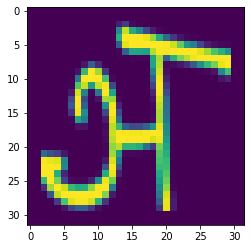

In [ ]:
# plotting one out to see it
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/Dataset/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10543.png')

plt.imshow(img)

print("Image Size:", img.size, "pixels")

In [ ]:
# converting from an image to a numpy array to see data type
import numpy as np

na = np.asarray(img)

print(na.dtype)
# the max element to check if the data is normalized already
print(np.max(np.asarray(img)))

uint8
255


## Data Augementation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 200

train_datagen = ImageDataGenerator(rescale=1./255,  # normalization
                                   rotation_range=50,  # rotation
                                   width_shift_range=0.2,  # random crop
                                   height_shift_range=0.2,  # random crop
                                   shear_range=0.8,  # random manipulation
                                   zoom_range=0.2,  # zooming in 
                                   fill_mode='constant',  # to fill with constant padding 
                                   horizontal_flip=True) # mirroring

train_generator = train_datagen.flow_from_directory(
        '/content/Dataset/DevanagariHandwrittenCharacterDataset/Train',
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale')

validation_generator = train_datagen.flow_from_directory(
        '/content/Dataset/DevanagariHandwrittenCharacterDataset/Test',
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale')

Found 61200 images belonging to 36 classes.
Found 10800 images belonging to 36 classes.


## Building the Model

INPUT SHAPE: (32 x 32 x 1)

2 CONVOLUTIONAL LAYERS
  - C1: with kernel size of (3 x 3), filters: 64
  - C2: with kernel size of (5 x 5), filters: 128
  - Batch Normalization
  - Max Pooling with kernel size of (2 x 2), stride of 2
  - Activation function: relu
  - C1: feature map shape (28 x 28)
  - C2: feature map shape (10 x 10)
  - no padding: valid

Flatten 

FC Layer
  - D1: 128 neurons, activation: relu (maybe can remove later)
  - Dropout: 0.2
  - D2/output: 36 neurons, activation: softmax

Optimizer
  - SGD with momentum of 0.9
  - Learning rate: 0.005 (maybe can change to 0.001 later)

Loss
  - categorical cross entropy

Epochs: 50

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD


INPUT_SHAPE = (32, 32, 1)

activation = 'relu'
model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=(3, 3), activation=activation, padding='valid', input_shape=INPUT_SHAPE))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model4.add(Conv2D(filters=64, kernel_size=(5, 5), activation=activation, padding='valid'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model4.add(Flatten())

model4.add(Dense(256, activation=activation))
model4.add(Dropout(0.2))
model4.add(Dense(36, activation="softmax"))

opt = SGD(learning_rate=0.005, momentum=0.9)

model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model4.summary()) 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
batch_normalization_11 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

### Saving Checkpoints

#### Imports

In [ ]:
! pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import tensorflow as tf

#### Checkpoint callback

In [ ]:
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

#### Early Stopping Callback

In [ ]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

## Hypertuning the model

## Fitting the Model

In [ ]:
history = model4.fit(
        x=train_generator,
        validation_data=validation_generator,
        steps_per_epoch=train_generator.samples // batch_size,  
        validation_steps=validation_generator.samples // batch_size,
        callbacks=[model_checkpoint_callback, early_stop_callback],
        epochs=50)

Epoch 1/50
306/306 [==============================] - 39s 123ms/step - loss: 3.6322 - accuracy: 0.0719 - val_loss: 4.1263 - val_accuracy: 0.0614
Epoch 2/50
306/306 [==============================] - 40s 130ms/step - loss: 2.8994 - accuracy: 0.1961 - val_loss: 2.7727 - val_accuracy: 0.2345
Epoch 3/50
306/306 [==============================] - 39s 127ms/step - loss: 2.4466 - accuracy: 0.3070 - val_loss: 2.3724 - val_accuracy: 0.3301
Epoch 4/50
306/306 [==============================] - 40s 131ms/step - loss: 2.0205 - accuracy: 0.4116 - val_loss: 1.6258 - val_accuracy: 0.5284
Epoch 5/50
306/306 [==============================] - 46s 150ms/step - loss: 1.7587 - accuracy: 0.4812 - val_loss: 1.5815 - val_accuracy: 0.5306
Epoch 6/50
306/306 [==============================] - 38s 124ms/step - loss: 1.5579 - accuracy: 0.5349 - val_loss: 1.5801 - val_accuracy: 0.5269
Epoch 7/50
306/306 [==============================] - 42s 136ms/step - loss: 1.4081 - accuracy: 0.5785 - val_loss: 1.4617 - val_ac